In [1]:
import numpy as np
from msmbuilder.feature_selection import VarianceThreshold
from msmbuilder.decomposition import tICA
from msmbuilder.cluster import MiniBatchKMeans, KMeans, LandmarkAgglomerative, MiniBatchKMedoids, KMedoids
from msmbuilder.msm import MarkovStateModel
from sklearn.pipeline import Pipeline
from glob import glob

/home/robert/anaconda3/envs/science/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/robert/anaconda3/envs/science/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [85]:
dirs = ['alpha_angle', 'kappa_angle', 'omega_tor', 'phi_tor', 'psi_tor']
feat_names = [r'$\alpha',r'$\kappa',r'$\omega',r'$\phi',r'$\psi']

In [30]:
variances = []
for dir_name in dirs:
    traj_paths = glob('/home/robert/Datasets/DHFR/train/'+dir_name+'/trajectory-*.npy')
    trajs = [np.load(x) for x in traj_paths]
    trajs = [traj for traj in trajs if not np.any(np.isnan(traj))]
    var = VarianceThreshold()
    var.fit(trajs)
    variances.append(var.variances_)
    

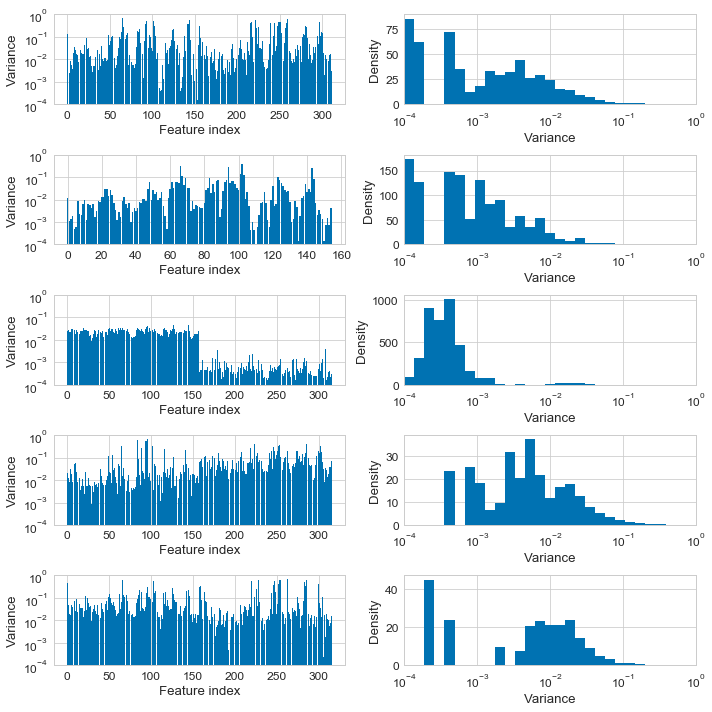

In [88]:
import seaborn as sns
with sns.plotting_context('paper', font_scale=1.5):
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(nrows=len(dirs),ncols=2, figsize=(10,10))
    cols = sns.color_palette('colorblind')
    for idx in range(len(dirs)):
        y = variances[idx]
        inds = np.arange(len(y))
        width=0.9
        # variances
        low, high = -4, 0
        
        axes[idx,0].bar(inds, y, width=width, color=cols[0])
        axes[idx,0].set_yscale('log')
        axes[idx,0].set_ylim((10**low, 10**high))
        axes[idx,0].set_ylabel('Variance')
        axes[idx,0].set_xlabel('Feature index')
        
        bins = np.logspace(low, high, 30)
        sns.distplot(y, ax=axes[idx,1],bins=bins, kde=False, norm_hist=True, color=cols[0], hist_kws={'alpha':1})
        axes[idx,1].set_xscale('log')
        axes[idx,1].set_xlim((10**low, 10**high))
        axes[idx,1].set_ylabel('Density')
        axes[idx,1].set_xlabel('Variance')



plt.tight_layout()
plt.save_fig('variances.pdf')

In [3]:
# traj_paths = glob('/home/robert/Datasets/DHFR/train/phi_tor/trajectory-*.npy')
# phi_tor =  [np.load(x) for x in traj_paths]

In [4]:
# selector = VarianceThreshold(threshold=1e-1)
# phi_tor_var = selector.fit(phi_tor).variances_
# phi_tor=None

In [5]:
selector = VarianceThreshold(threshold=1e-1)
pp_tor_var = selector.fit(pp_tor).variances_
pp_tor = None

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
mask = selector.get_support()
from copy import copy

red_var = copy(pp_tor_var)
red_var[~mask] = 0

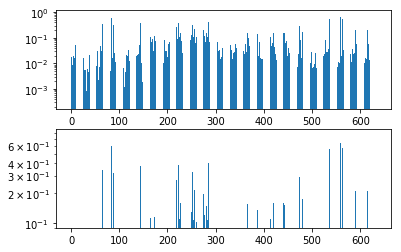

In [16]:
fig, ax = plt.subplots(2)
ax[0].bar(np.arange(len(pp_tor_var)), pp_tor_var, width=0.5)
ax[1].bar(np.arange(len(red_var)), red_var, width=0.5)
for a in ax:
    a.set_yscale('log')

(array([ 92.,  90.,  99.,  63.,  40.,  31.,  20.,  18.,  20.,  14.,   9.,
         11.,   4.,  12.,  13.,   4.,   4.,   4.,   4.,   5.,   7.,   2.,
          2.,   5.,   4.,   5.,   3.,   2.,   0.,   0.,   0.,   2.,   1.,
          0.,   2.,   1.,   3.,   0.,   1.,   1.,   2.,   1.,   2.,   1.,
          0.,   2.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   3.,   0.,   2.,   0.,   0.,   0.,   3.,   2.,
          0.,   0.,   0.,   2.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]), array([  2.41172314e-04,   8.19770004e-03,   1.61542278e-02,
          2.41107555e-02,   3.20672832e-02,   4.00238110e-02,
          4.79803387e-02,   5.59368664e-02,   6.38933941e-02,
          7.18499219e-02,   7.98064496e-02,   8.77629773e-02,
          9.57195051e-02,   1.03676033e-01,   1.11632561e-01,
         

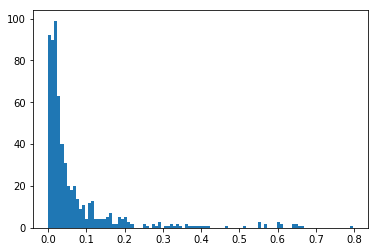

In [17]:
plt.hist(pp_tor_var, bins=100)